In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#######################################################
# Database Setup 
# (it prepares the database file to be connected later)
########################################################
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

## "Reflecting" is essentially transfering database contents into a 
## different structure of data using automap_base
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
## FMJ WORK
from sqlalchemy import inspect

inspector = inspect(engine)
column_names = inspector.get_columns('measurement')
for col in column_names:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
## FMJ WORK
# Query All Records in the the Database
data = engine.execute("SELECT tobs FROM measurement")

for record in data:
    print(record)

(65.0,)
(63.0,)
(74.0,)
(76.0,)
(73.0,)
(70.0,)
(64.0,)
(68.0,)
(73.0,)
(64.0,)
(61.0,)
(66.0,)
(65.0,)
(68.0,)
(64.0,)
(72.0,)
(66.0,)
(66.0,)
(69.0,)
(67.0,)
(67.0,)
(71.0,)
(67.0,)
(76.0,)
(68.0,)
(72.0,)
(70.0,)
(67.0,)
(66.0,)
(67.0,)
(69.0,)
(67.0,)
(67.0,)
(64.0,)
(69.0,)
(73.0,)
(73.0,)
(69.0,)
(69.0,)
(69.0,)
(71.0,)
(61.0,)
(69.0,)
(63.0,)
(64.0,)
(65.0,)
(67.0,)
(68.0,)
(65.0,)
(76.0,)
(75.0,)
(66.0,)
(70.0,)
(72.0,)
(73.0,)
(70.0,)
(71.0,)
(72.0,)
(72.0,)
(69.0,)
(70.0,)
(73.0,)
(72.0,)
(73.0,)
(70.0,)
(71.0,)
(68.0,)
(70.0,)
(72.0,)
(69.0,)
(68.0,)
(74.0,)
(72.0,)
(72.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(74.0,)
(71.0,)
(72.0,)
(75.0,)
(75.0,)
(75.0,)
(75.0,)
(73.0,)
(73.0,)
(71.0,)
(71.0,)
(68.0,)
(70.0,)
(71.0,)
(74.0,)
(71.0,)
(75.0,)
(76.0,)
(75.0,)
(75.0,)
(76.0,)
(76.0,)
(76.0,)
(77.0,)
(77.0,)
(73.0,)
(74.0,)
(76.0,)
(76.0,)
(80.0,)
(74.0,)
(77.0,)
(77.0,)
(76.0,)
(77.0,)
(78.0,)
(78.0,)
(75.0,)
(73.0,)
(77.0,)
(76.0,)
(77.0,)
(77.0,)
(78.0,)
(75.0,)


(67.0,)
(72.0,)
(70.0,)
(70.0,)
(69.0,)
(69.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(71.0,)
(72.0,)
(72.0,)
(70.0,)
(71.0,)
(71.0,)
(65.0,)
(64.0,)
(73.0,)
(68.0,)
(63.0,)
(66.0,)
(63.0,)
(66.0,)
(64.0,)
(69.0,)
(62.0,)
(64.0,)
(66.0,)
(69.0,)
(71.0,)
(74.0,)
(72.0,)
(71.0,)
(68.0,)
(69.0,)
(71.0,)
(72.0,)
(70.0,)
(70.0,)
(64.0,)
(63.0,)
(61.0,)
(67.0,)
(68.0,)
(73.0,)
(74.0,)
(71.0,)
(74.0,)
(74.0,)
(74.0,)
(77.0,)
(75.0,)
(75.0,)
(76.0,)
(72.0,)
(70.0,)
(77.0,)
(75.0,)
(75.0,)
(74.0,)
(73.0,)
(73.0,)
(76.0,)
(70.0,)
(76.0,)
(76.0,)
(74.0,)
(72.0,)
(76.0,)
(74.0,)
(78.0,)
(75.0,)
(84.0,)
(69.0,)
(69.0,)
(75.0,)
(72.0,)
(73.0,)
(77.0,)
(77.0,)
(76.0,)
(75.0,)
(77.0,)
(78.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(73.0,)
(74.0,)
(71.0,)
(78.0,)
(79.0,)
(79.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(78.0,)
(77.0,)
(79.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(79.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)


(80.0,)
(80.0,)
(79.0,)
(79.0,)
(79.0,)
(79.0,)
(80.0,)
(78.0,)
(80.0,)
(77.0,)
(80.0,)
(76.0,)
(77.0,)
(81.0,)
(79.0,)
(80.0,)
(79.0,)
(77.0,)
(78.0,)
(78.0,)
(79.0,)
(80.0,)
(81.0,)
(80.0,)
(79.0,)
(75.0,)
(79.0,)
(76.0,)
(76.0,)
(80.0,)
(79.0,)
(78.0,)
(76.0,)
(78.0,)
(78.0,)
(75.0,)
(79.0,)
(80.0,)
(79.0,)
(81.0,)
(77.0,)
(77.0,)
(78.0,)
(76.0,)
(82.0,)
(81.0,)
(78.0,)
(80.0,)
(80.0,)
(79.0,)
(80.0,)
(80.0,)
(80.0,)
(79.0,)
(79.0,)
(79.0,)
(80.0,)
(80.0,)
(79.0,)
(78.0,)
(76.0,)
(75.0,)
(80.0,)
(80.0,)
(79.0,)
(80.0,)
(79.0,)
(78.0,)
(78.0,)
(80.0,)
(81.0,)
(79.0,)
(77.0,)
(79.0,)
(78.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(78.0,)
(77.0,)
(76.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(76.0,)
(75.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(71.0,)
(72.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(75.0,)
(76.0,)
(76.0,)
(75.0,)
(72.0,)
(74.0,)
(75.0,)
(73.0,)
(76.0,)
(75.0,)
(68.0,)
(75.0,)
(75.0,)
(72.0,)
(69.0,)
(71.0,)
(68.0,)
(67.0,)
(69.0,)
(73.0,)
(70.0,)
(70.0,)
(70.0,)
(66.0,)


(67.0,)
(74.0,)
(68.0,)
(69.0,)
(74.0,)
(74.0,)
(73.0,)
(74.0,)
(74.0,)
(74.0,)
(74.0,)
(73.0,)
(74.0,)
(73.0,)
(72.0,)
(73.0,)
(72.0,)
(76.0,)
(73.0,)
(71.0,)
(67.0,)
(68.0,)
(77.0,)
(69.0,)
(72.0,)
(71.0,)
(69.0,)
(65.0,)
(65.0,)
(65.0,)
(70.0,)
(76.0,)
(68.0,)
(71.0,)
(71.0,)
(68.0,)
(70.0,)
(73.0,)
(73.0,)
(72.0,)
(71.0,)
(70.0,)
(72.0,)
(71.0,)
(72.0,)
(72.0,)
(71.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(66.0,)
(65.0,)
(73.0,)
(72.0,)
(72.0,)
(65.0,)
(65.0,)
(68.0,)
(67.0,)
(71.0,)
(69.0,)
(68.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(77.0,)
(74.0,)
(64.0,)
(60.0,)
(62.0,)
(62.0,)
(67.0,)
(68.0,)
(70.0,)
(70.0,)
(70.0,)
(67.0,)
(64.0,)
(65.0,)
(74.0,)
(64.0,)
(65.0,)
(64.0,)
(70.0,)
(69.0,)
(70.0,)
(67.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(69.0,)
(70.0,)
(69.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(70.0,)
(68.0,)
(70.0,)
(69.0,)
(70.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(68.0,)
(69.0,)
(70.0,)
(70.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(69.0,)
(66.0,)


(74.0,)
(78.0,)
(81.0,)
(75.0,)
(82.0,)
(78.0,)
(76.0,)
(77.0,)
(76.0,)
(77.0,)
(76.0,)
(78.0,)
(79.0,)
(76.0,)
(75.0,)
(79.0,)
(79.0,)
(75.0,)
(70.0,)
(81.0,)
(77.0,)
(73.0,)
(75.0,)
(73.0,)
(74.0,)
(74.0,)
(71.0,)
(73.0,)
(75.0,)
(77.0,)
(78.0,)
(76.0,)
(74.0,)
(75.0,)
(80.0,)
(72.0,)
(73.0,)
(70.0,)
(69.0,)
(77.0,)
(74.0,)
(77.0,)
(72.0,)
(69.0,)
(69.0,)
(75.0,)
(75.0,)
(72.0,)
(73.0,)
(78.0,)
(75.0,)
(75.0,)
(74.0,)
(73.0,)
(70.0,)
(70.0,)
(72.0,)
(74.0,)
(74.0,)
(67.0,)
(74.0,)
(70.0,)
(63.0,)
(73.0,)
(71.0,)
(72.0,)
(68.0,)
(70.0,)
(71.0,)
(69.0,)
(71.0,)
(72.0,)
(72.0,)
(66.0,)
(77.0,)
(66.0,)
(71.0,)
(72.0,)
(67.0,)
(67.0,)
(73.0,)
(67.0,)
(75.0,)
(70.0,)
(71.0,)
(70.0,)
(70.0,)
(77.0,)
(71.0,)
(68.0,)
(69.0,)
(67.0,)
(72.0,)
(78.0,)
(68.0,)
(71.0,)
(70.0,)
(70.0,)
(75.0,)
(71.0,)
(74.0,)
(66.0,)
(63.0,)
(72.0,)
(74.0,)
(75.0,)
(74.0,)
(79.0,)
(75.0,)
(73.0,)
(74.0,)
(69.0,)
(76.0,)
(74.0,)
(74.0,)
(65.0,)
(75.0,)
(72.0,)
(77.0,)
(76.0,)
(80.0,)
(79.0,)
(73.0,)
(71.0,)
(72.0,)


(78.0,)
(76.0,)
(74.0,)
(76.0,)
(75.0,)
(75.0,)
(78.0,)
(77.0,)
(75.0,)
(75.0,)
(75.0,)
(74.0,)
(72.0,)
(75.0,)
(75.0,)
(74.0,)
(76.0,)
(77.0,)
(76.0,)
(76.0,)
(74.0,)
(76.0,)
(70.0,)
(73.0,)
(76.0,)
(77.0,)
(75.0,)
(75.0,)
(74.0,)
(73.0,)
(74.0,)
(75.0,)
(72.0,)
(68.0,)
(73.0,)
(73.0,)
(77.0,)
(70.0,)
(74.0,)
(73.0,)
(72.0,)
(73.0,)
(76.0,)
(75.0,)
(74.0,)
(74.0,)
(69.0,)
(72.0,)
(71.0,)
(74.0,)
(72.0,)
(72.0,)
(71.0,)
(74.0,)
(75.0,)
(74.0,)
(71.0,)
(72.0,)
(73.0,)
(72.0,)
(74.0,)
(72.0,)
(72.0,)
(71.0,)
(74.0,)
(71.0,)
(69.0,)
(67.0,)
(67.0,)
(70.0,)
(68.0,)
(73.0,)
(71.0,)
(71.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(72.0,)
(74.0,)
(71.0,)
(70.0,)
(70.0,)
(69.0,)
(71.0,)
(70.0,)
(70.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(70.0,)
(66.0,)
(71.0,)
(70.0,)
(67.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(73.0,)
(70.0,)
(67.0,)
(65.0,)
(66.0,)
(73.0,)
(73.0,)
(73.0,)
(72.0,)
(66.0,)
(71.0,)
(74.0,)
(64.0,)
(70.0,)
(71.0,)
(63.0,)
(74.0,)
(67.0,)
(67.0,)
(68.0,)
(70.0,)
(64.0,)
(74.0,)


(77.0,)
(75.0,)
(77.0,)
(77.0,)
(77.0,)
(79.0,)
(77.0,)
(73.0,)
(73.0,)
(76.0,)
(74.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(79.0,)
(78.0,)
(78.0,)
(74.0,)
(78.0,)
(78.0,)
(78.0,)
(79.0,)
(79.0,)
(78.0,)
(76.0,)
(78.0,)
(79.0,)
(79.0,)
(78.0,)
(74.0,)
(72.0,)
(71.0,)
(74.0,)
(75.0,)
(75.0,)
(74.0,)
(76.0,)
(75.0,)
(77.0,)
(77.0,)
(79.0,)
(79.0,)
(78.0,)
(79.0,)
(73.0,)
(78.0,)
(79.0,)
(80.0,)
(76.0,)
(79.0,)
(79.0,)
(77.0,)
(80.0,)
(79.0,)
(78.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(79.0,)
(79.0,)
(77.0,)
(77.0,)
(78.0,)
(81.0,)
(77.0,)
(80.0,)
(80.0,)
(78.0,)
(80.0,)
(78.0,)
(80.0,)
(80.0,)
(80.0,)
(79.0,)
(78.0,)
(77.0,)
(82.0,)
(81.0,)
(76.0,)
(78.0,)
(80.0,)
(82.0,)
(79.0,)
(83.0,)
(82.0,)
(81.0,)
(81.0,)
(79.0,)
(81.0,)
(83.0,)
(81.0,)
(81.0,)
(79.0,)
(79.0,)
(80.0,)
(81.0,)
(79.0,)
(80.0,)
(80.0,)
(81.0,)
(81.0,)
(81.0,)
(81.0,)
(80.0,)
(80.0,)
(82.0,)
(81.0,)
(82.0,)
(80.0,)
(80.0,)
(81.0,)
(77.0,)
(79.0,)
(79.0,)
(79.0,)
(81.0,)
(79.0,)
(79.0,)
(80.0,)
(80.0,)
(78.0,)
(81.0,)
(82.0,)


(79.0,)
(77.0,)
(79.0,)
(78.0,)
(80.0,)
(81.0,)
(81.0,)
(81.0,)
(80.0,)
(81.0,)
(77.0,)
(80.0,)
(80.0,)
(81.0,)
(82.0,)
(81.0,)
(81.0,)
(81.0,)
(81.0,)
(81.0,)
(81.0,)
(79.0,)
(80.0,)
(80.0,)
(81.0,)
(83.0,)
(81.0,)
(81.0,)
(81.0,)
(80.0,)
(80.0,)
(79.0,)
(76.0,)
(80.0,)
(82.0,)
(80.0,)
(79.0,)
(80.0,)
(77.0,)
(83.0,)
(83.0,)
(80.0,)
(80.0,)
(80.0,)
(83.0,)
(84.0,)
(81.0,)
(80.0,)
(79.0,)
(82.0,)
(82.0,)
(82.0,)
(81.0,)
(80.0,)
(82.0,)
(83.0,)
(82.0,)
(82.0,)
(82.0,)
(83.0,)
(80.0,)
(81.0,)
(81.0,)
(80.0,)
(84.0,)
(83.0,)
(80.0,)
(81.0,)
(77.0,)
(80.0,)
(80.0,)
(79.0,)
(81.0,)
(81.0,)
(83.0,)
(81.0,)
(77.0,)
(75.0,)
(73.0,)
(78.0,)
(77.0,)
(79.0,)
(81.0,)
(77.0,)
(78.0,)
(74.0,)
(75.0,)
(74.0,)
(77.0,)
(76.0,)
(77.0,)
(75.0,)
(76.0,)
(75.0,)
(77.0,)
(75.0,)
(77.0,)
(74.0,)
(78.0,)
(77.0,)
(76.0,)
(69.0,)
(70.0,)
(64.0,)
(75.0,)
(62.0,)
(59.0,)
(65.0,)
(70.0,)
(72.0,)
(70.0,)
(70.0,)
(72.0,)
(72.0,)
(74.0,)
(70.0,)
(69.0,)
(66.0,)
(70.0,)
(69.0,)
(71.0,)
(70.0,)
(72.0,)
(74.0,)
(68.0,)


(76.0,)
(76.0,)
(76.0,)
(74.0,)
(76.0,)
(75.0,)
(76.0,)
(77.0,)
(75.0,)
(73.0,)
(71.0,)
(72.0,)
(76.0,)
(80.0,)
(78.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(81.0,)
(77.0,)
(80.0,)
(76.0,)
(72.0,)
(76.0,)
(76.0,)
(76.0,)
(77.0,)
(76.0,)
(72.0,)
(73.0,)
(74.0,)
(77.0,)
(76.0,)
(77.0,)
(80.0,)
(76.0,)
(75.0,)
(76.0,)
(77.0,)
(75.0,)
(81.0,)
(77.0,)
(74.0,)
(75.0,)
(70.0,)
(72.0,)
(74.0,)
(74.0,)
(76.0,)
(76.0,)
(73.0,)
(75.0,)
(75.0,)
(76.0,)
(76.0,)
(76.0,)
(75.0,)
(75.0,)
(66.0,)
(74.0,)
(68.0,)
(79.0,)
(77.0,)
(67.0,)
(69.0,)
(76.0,)
(76.0,)
(77.0,)
(76.0,)
(76.0,)
(73.0,)
(76.0,)
(78.0,)
(74.0,)
(74.0,)
(78.0,)
(78.0,)
(61.0,)
(69.0,)
(65.0,)
(77.0,)
(67.0,)
(69.0,)
(75.0,)
(67.0,)
(71.0,)
(74.0,)
(66.0,)
(66.0,)
(77.0,)
(70.0,)
(73.0,)
(71.0,)
(71.0,)
(71.0,)
(67.0,)
(71.0,)
(74.0,)
(76.0,)
(72.0,)
(74.0,)
(75.0,)
(69.0,)
(69.0,)
(74.0,)
(74.0,)
(73.0,)
(62.0,)
(68.0,)
(66.0,)
(73.0,)
(73.0,)
(73.0,)
(58.0,)
(71.0,)
(70.0,)
(76.0,)
(66.0,)
(70.0,)
(70.0,)
(63.0,)
(63.0,)
(70.0,)
(74.0,)


(73.0,)
(72.0,)
(62.0,)
(66.0,)
(63.0,)
(62.0,)
(69.0,)
(67.0,)
(72.0,)
(73.0,)
(71.0,)
(71.0,)
(73.0,)
(73.0,)
(69.0,)
(69.0,)
(67.0,)
(69.0,)
(70.0,)
(76.0,)
(72.0,)
(70.0,)
(72.0,)
(73.0,)
(70.0,)
(77.0,)
(69.0,)
(73.0,)
(74.0,)
(76.0,)
(73.0,)
(75.0,)
(74.0,)
(76.0,)
(77.0,)
(74.0,)
(67.0,)
(70.0,)
(70.0,)
(71.0,)
(68.0,)
(71.0,)
(73.0,)
(73.0,)
(72.0,)
(73.0,)
(74.0,)
(75.0,)
(75.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(73.0,)
(74.0,)
(76.0,)
(71.0,)
(72.0,)
(73.0,)
(73.0,)
(71.0,)
(77.0,)
(76.0,)
(69.0,)
(75.0,)
(77.0,)
(74.0,)
(73.0,)
(75.0,)
(79.0,)
(73.0,)
(79.0,)
(72.0,)
(75.0,)
(73.0,)
(73.0,)
(76.0,)
(76.0,)
(77.0,)
(73.0,)
(74.0,)
(75.0,)
(76.0,)
(76.0,)
(77.0,)
(78.0,)
(76.0,)
(76.0,)
(76.0,)
(77.0,)
(79.0,)
(80.0,)
(78.0,)
(76.0,)
(78.0,)
(78.0,)
(77.0,)
(79.0,)
(79.0,)
(75.0,)
(76.0,)
(77.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(74.0,)
(79.0,)
(76.0,)
(74.0,)
(76.0,)
(79.0,)
(82.0,)
(76.0,)
(80.0,)
(74.0,)
(77.0,)
(77.0,)
(77.0,)
(74.0,)
(81.0,)
(81.0,)
(81.0,)
(81.0,)


(65.0,)
(75.0,)
(69.0,)
(67.0,)
(66.0,)
(69.0,)
(72.0,)
(67.0,)
(65.0,)
(64.0,)
(67.0,)
(67.0,)
(68.0,)
(69.0,)
(66.0,)
(69.0,)
(61.0,)
(71.0,)
(70.0,)
(70.0,)
(66.0,)
(71.0,)
(61.0,)
(68.0,)
(67.0,)
(62.0,)
(65.0,)
(69.0,)
(63.0,)
(62.0,)
(61.0,)
(64.0,)
(72.0,)
(68.0,)
(68.0,)
(68.0,)
(71.0,)
(69.0,)
(65.0,)
(67.0,)
(71.0,)
(70.0,)
(69.0,)
(69.0,)
(70.0,)
(69.0,)
(70.0,)
(73.0,)
(74.0,)
(67.0,)
(68.0,)
(64.0,)
(65.0,)
(68.0,)
(68.0,)
(72.0,)
(67.0,)
(64.0,)
(71.0,)
(70.0,)
(72.0,)
(73.0,)
(74.0,)
(69.0,)
(71.0,)
(72.0,)
(71.0,)
(74.0,)
(73.0,)
(71.0,)
(71.0,)
(69.0,)
(69.0,)
(72.0,)
(68.0,)
(75.0,)
(69.0,)
(65.0,)
(68.0,)
(65.0,)
(66.0,)
(64.0,)
(69.0,)
(69.0,)
(70.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(77.0,)
(77.0,)
(71.0,)
(71.0,)
(70.0,)
(70.0,)
(72.0,)
(73.0,)
(71.0,)
(70.0,)
(72.0,)
(73.0,)
(72.0,)
(68.0,)
(76.0,)
(77.0,)
(73.0,)
(69.0,)
(71.0,)
(73.0,)
(73.0,)
(77.0,)
(73.0,)
(73.0,)
(72.0,)
(72.0,)
(71.0,)
(73.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(73.0,)
(69.0,)
(69.0,)
(75.0,)


(74.0,)
(66.0,)
(70.0,)
(70.0,)
(70.0,)
(69.0,)
(69.0,)
(67.0,)
(73.0,)
(71.0,)
(68.0,)
(68.0,)
(67.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(71.0,)
(70.0,)
(72.0,)
(70.0,)
(71.0,)
(70.0,)
(70.0,)
(68.0,)
(71.0,)
(70.0,)
(73.0,)
(71.0,)
(74.0,)
(68.0,)
(62.0,)
(64.0,)
(68.0,)
(66.0,)
(66.0,)
(66.0,)
(64.0,)
(62.0,)
(67.0,)
(67.0,)
(63.0,)
(74.0,)
(69.0,)
(68.0,)
(69.0,)
(70.0,)
(71.0,)
(70.0,)
(70.0,)
(72.0,)
(62.0,)
(68.0,)
(66.0,)
(72.0,)
(71.0,)
(73.0,)
(73.0,)
(75.0,)
(71.0,)
(71.0,)
(75.0,)
(74.0,)
(73.0,)
(74.0,)
(70.0,)
(70.0,)
(63.0,)
(70.0,)
(71.0,)
(72.0,)
(68.0,)
(76.0,)
(70.0,)
(74.0,)
(68.0,)
(71.0,)
(71.0,)
(75.0,)
(79.0,)
(74.0,)
(67.0,)
(70.0,)
(73.0,)
(70.0,)
(76.0,)
(75.0,)
(69.0,)
(64.0,)
(65.0,)
(67.0,)
(71.0,)
(74.0,)
(71.0,)
(73.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(81.0,)
(78.0,)
(69.0,)
(69.0,)
(75.0,)
(73.0,)
(74.0,)
(78.0,)
(78.0,)
(79.0,)
(74.0,)
(71.0,)
(74.0,)
(72.0,)
(81.0,)
(74.0,)
(74.0,)
(73.0,)
(73.0,)
(72.0,)


(63.0,)
(63.0,)
(62.0,)
(70.0,)
(72.0,)
(67.0,)
(74.0,)
(66.0,)
(68.0,)
(68.0,)
(72.0,)
(72.0,)
(71.0,)
(70.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(71.0,)
(66.0,)
(65.0,)
(63.0,)
(64.0,)
(72.0,)
(76.0,)
(76.0,)
(73.0,)
(72.0,)
(62.0,)
(65.0,)
(68.0,)
(74.0,)
(74.0,)
(74.0,)
(65.0,)
(69.0,)
(65.0,)
(68.0,)
(74.0,)
(70.0,)
(71.0,)
(74.0,)
(75.0,)
(73.0,)
(74.0,)
(76.0,)
(71.0,)
(68.0,)
(67.0,)
(72.0,)
(73.0,)
(73.0,)
(75.0,)
(75.0,)
(74.0,)
(74.0,)
(74.0,)
(73.0,)
(74.0,)
(74.0,)
(75.0,)
(73.0,)
(74.0,)
(72.0,)
(68.0,)
(66.0,)
(69.0,)
(67.0,)
(68.0,)
(68.0,)
(67.0,)
(65.0,)
(68.0,)
(70.0,)
(76.0,)
(75.0,)
(75.0,)
(72.0,)
(75.0,)
(72.0,)
(76.0,)
(76.0,)
(74.0,)
(69.0,)
(71.0,)
(74.0,)
(75.0,)
(72.0,)
(74.0,)
(70.0,)
(70.0,)
(69.0,)
(67.0,)
(68.0,)
(65.0,)
(70.0,)
(72.0,)
(74.0,)
(73.0,)
(71.0,)
(75.0,)
(72.0,)
(75.0,)
(76.0,)
(75.0,)
(76.0,)
(75.0,)
(71.0,)
(75.0,)
(75.0,)
(72.0,)
(72.0,)
(75.0,)
(73.0,)
(76.0,)
(74.0,)
(77.0,)
(72.0,)
(71.0,)
(76.0,)
(77.0,)
(76.0,)
(79.0,)
(76.0,)
(79.0,)


(59.0,)
(58.0,)
(71.0,)
(74.0,)
(72.0,)
(66.0,)
(61.0,)
(66.0,)
(71.0,)
(71.0,)
(74.0,)
(77.0,)
(68.0,)
(65.0,)
(74.0,)
(75.0,)
(64.0,)
(75.0,)
(74.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(64.0,)
(75.0,)
(65.0,)
(69.0,)
(70.0,)
(69.0,)
(66.0,)
(65.0,)
(78.0,)
(74.0,)
(77.0,)
(70.0,)
(69.0,)
(68.0,)
(70.0,)
(76.0,)
(74.0,)
(68.0,)
(71.0,)
(68.0,)
(64.0,)
(65.0,)
(74.0,)
(75.0,)
(63.0,)
(64.0,)
(71.0,)
(72.0,)
(71.0,)
(76.0,)
(79.0,)
(68.0,)
(71.0,)
(73.0,)
(75.0,)
(74.0,)
(76.0,)
(78.0,)
(76.0,)
(77.0,)
(74.0,)
(71.0,)
(73.0,)
(76.0,)
(76.0,)
(74.0,)
(71.0,)
(72.0,)
(73.0,)
(77.0,)
(77.0,)
(77.0,)
(79.0,)
(77.0,)
(77.0,)
(78.0,)
(78.0,)
(81.0,)
(76.0,)
(74.0,)
(71.0,)
(78.0,)
(71.0,)
(76.0,)
(81.0,)
(73.0,)
(72.0,)
(72.0,)
(74.0,)
(72.0,)
(79.0,)
(77.0,)
(73.0,)
(73.0,)
(79.0,)
(74.0,)
(74.0,)
(79.0,)
(73.0,)
(72.0,)
(77.0,)
(71.0,)
(75.0,)
(81.0,)
(81.0,)
(73.0,)
(74.0,)
(81.0,)
(79.0,)
(77.0,)
(76.0,)
(69.0,)
(78.0,)
(81.0,)
(84.0,)
(86.0,)
(80.0,)
(76.0,)
(74.0,)
(80.0,)
(76.0,)
(76.0,)


(71.0,)
(62.0,)
(63.0,)
(68.0,)
(62.0,)
(63.0,)
(65.0,)
(69.0,)
(63.0,)
(73.0,)
(66.0,)
(63.0,)
(69.0,)
(65.0,)
(71.0,)
(78.0,)
(75.0,)
(71.0,)
(73.0,)
(67.0,)
(71.0,)
(68.0,)
(69.0,)
(72.0,)
(73.0,)
(69.0,)
(71.0,)
(66.0,)
(74.0,)
(76.0,)
(80.0,)
(79.0,)
(77.0,)
(70.0,)
(63.0,)
(70.0,)
(64.0,)
(64.0,)
(67.0,)
(71.0,)
(70.0,)
(70.0,)
(71.0,)
(80.0,)
(73.0,)
(66.0,)
(69.0,)
(69.0,)
(72.0,)
(72.0,)
(73.0,)
(72.0,)
(73.0,)
(72.0,)
(74.0,)
(69.0,)
(75.0,)
(74.0,)
(72.0,)
(72.0,)
(79.0,)
(78.0,)
(82.0,)
(70.0,)
(77.0,)
(67.0,)
(74.0,)
(68.0,)
(67.0,)
(70.0,)
(66.0,)
(70.0,)
(67.0,)
(68.0,)
(68.0,)
(71.0,)
(74.0,)
(69.0,)
(69.0,)
(66.0,)
(67.0,)
(69.0,)
(72.0,)
(72.0,)
(72.0,)
(70.0,)
(75.0,)
(73.0,)
(70.0,)
(71.0,)
(67.0,)
(71.0,)
(77.0,)
(76.0,)
(73.0,)
(77.0,)
(75.0,)
(71.0,)
(75.0,)
(75.0,)
(72.0,)
(77.0,)
(71.0,)
(77.0,)
(72.0,)
(74.0,)
(78.0,)
(82.0,)
(85.0,)
(84.0,)
(76.0,)
(76.0,)
(76.0,)
(78.0,)
(73.0,)
(73.0,)
(75.0,)
(82.0,)
(79.0,)
(76.0,)
(84.0,)
(86.0,)
(82.0,)
(78.0,)
(76.0,)


(69.0,)
(70.0,)
(70.0,)
(74.0,)
(73.0,)
(73.0,)
(70.0,)
(69.0,)
(70.0,)
(71.0,)
(72.0,)
(70.0,)
(71.0,)
(70.0,)
(76.0,)
(73.0,)
(69.0,)
(75.0,)
(75.0,)
(73.0,)
(71.0,)
(71.0,)
(72.0,)
(69.0,)
(72.0,)
(72.0,)
(71.0,)
(78.0,)
(72.0,)
(73.0,)
(71.0,)
(72.0,)
(72.0,)
(71.0,)
(74.0,)
(71.0,)
(72.0,)
(72.0,)
(74.0,)
(72.0,)
(69.0,)
(70.0,)
(76.0,)
(70.0,)
(71.0,)
(73.0,)
(68.0,)
(68.0,)
(69.0,)
(70.0,)
(69.0,)
(69.0,)
(70.0,)
(71.0,)
(70.0,)
(67.0,)
(72.0,)
(73.0,)
(69.0,)
(72.0,)
(73.0,)
(67.0,)
(73.0,)
(70.0,)
(72.0,)
(74.0,)
(70.0,)
(71.0,)
(71.0,)
(72.0,)
(73.0,)
(71.0,)
(72.0,)
(73.0,)
(72.0,)
(71.0,)
(72.0,)
(72.0,)
(82.0,)
(72.0,)
(70.0,)
(72.0,)
(69.0,)
(72.0,)
(74.0,)
(74.0,)
(73.0,)
(71.0,)
(75.0,)
(72.0,)
(74.0,)
(73.0,)
(73.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(78.0,)
(73.0,)
(71.0,)
(77.0,)
(75.0,)
(76.0,)
(78.0,)
(72.0,)
(73.0,)
(74.0,)
(79.0,)
(71.0,)
(71.0,)
(74.0,)
(75.0,)
(71.0,)
(71.0,)
(73.0,)
(74.0,)
(76.0,)
(76.0,)
(73.0,)
(71.0,)
(72.0,)
(75.0,)
(75.0,)
(71.0,)
(71.0,)


(72.0,)
(68.0,)
(66.0,)
(64.0,)
(69.0,)
(69.0,)
(64.0,)
(72.0,)
(78.0,)
(70.0,)
(68.0,)
(76.0,)
(72.0,)
(68.0,)
(72.0,)
(65.0,)
(82.0,)
(69.0,)
(75.0,)
(76.0,)
(77.0,)
(70.0,)
(74.0,)
(74.0,)
(72.0,)
(72.0,)
(70.0,)
(70.0,)
(72.0,)
(72.0,)
(74.0,)
(69.0,)
(69.0,)
(76.0,)
(69.0,)
(71.0,)
(73.0,)
(75.0,)
(69.0,)
(72.0,)
(76.0,)
(70.0,)
(72.0,)
(71.0,)
(70.0,)
(73.0,)
(72.0,)
(70.0,)
(71.0,)
(69.0,)
(71.0,)
(71.0,)
(69.0,)
(70.0,)
(73.0,)
(70.0,)
(75.0,)
(74.0,)
(77.0,)
(76.0,)
(71.0,)
(68.0,)
(58.0,)
(73.0,)
(79.0,)
(74.0,)
(74.0,)
(74.0,)
(70.0,)
(66.0,)
(72.0,)
(72.0,)
(78.0,)
(70.0,)
(71.0,)
(70.0,)
(72.0,)
(71.0,)
(71.0,)
(69.0,)
(70.0,)
(69.0,)
(72.0,)
(69.0,)
(70.0,)
(75.0,)
(72.0,)
(72.0,)
(73.0,)
(72.0,)
(74.0,)
(74.0,)
(77.0,)
(74.0,)
(74.0,)
(79.0,)
(75.0,)
(72.0,)
(76.0,)
(74.0,)
(73.0,)
(74.0,)
(77.0,)
(74.0,)
(72.0,)
(77.0,)
(76.0,)
(74.0,)
(75.0,)
(76.0,)
(71.0,)
(73.0,)
(79.0,)
(79.0,)
(74.0,)
(74.0,)
(76.0,)
(75.0,)
(74.0,)
(78.0,)
(77.0,)
(77.0,)
(75.0,)
(74.0,)
(74.0,)


In [12]:
## FMJ WORK
date_temp = engine.execute("SELECT date, tobs FROM measurement")

for record in date_temp:
    print(record)

('2010-01-01', 65.0)
('2010-01-02', 63.0)
('2010-01-03', 74.0)
('2010-01-04', 76.0)
('2010-01-06', 73.0)
('2010-01-07', 70.0)
('2010-01-08', 64.0)
('2010-01-09', 68.0)
('2010-01-10', 73.0)
('2010-01-11', 64.0)
('2010-01-12', 61.0)
('2010-01-14', 66.0)
('2010-01-15', 65.0)
('2010-01-16', 68.0)
('2010-01-17', 64.0)
('2010-01-18', 72.0)
('2010-01-19', 66.0)
('2010-01-20', 66.0)
('2010-01-21', 69.0)
('2010-01-22', 67.0)
('2010-01-23', 67.0)
('2010-01-24', 71.0)
('2010-01-25', 67.0)
('2010-01-26', 76.0)
('2010-01-27', 68.0)
('2010-01-28', 72.0)
('2010-01-30', 70.0)
('2010-01-31', 67.0)
('2010-02-01', 66.0)
('2010-02-03', 67.0)
('2010-02-04', 69.0)
('2010-02-05', 67.0)
('2010-02-06', 67.0)
('2010-02-07', 64.0)
('2010-02-08', 69.0)
('2010-02-09', 73.0)
('2010-02-11', 73.0)
('2010-02-12', 69.0)
('2010-02-13', 69.0)
('2010-02-14', 69.0)
('2010-02-15', 71.0)
('2010-02-16', 61.0)
('2010-02-17', 69.0)
('2010-02-19', 63.0)
('2010-02-20', 64.0)
('2010-02-21', 65.0)
('2010-02-22', 67.0)
('2010-02-23'

('2011-05-31', 73.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19', 75.0)
('2011-06-20', 76.0)
('2011-06-21', 76.0)
('2011-06-24', 77.0)
('2011-06-25', 78.0)
('2011-06-26', 76.0)
('2011-06-27', 77.0)
('2011-06-28', 75.0)
('2011-06-29', 77.0)
('2011-07-01', 77.0)
('2011-07-02', 78.0)
('2011-07-03', 78.0)
('2011-07-04', 78.0)
('2011-07-05', 78.0)
('2011-07-06', 76.0)
('2011-07-07', 76.0)
('2011-07-08', 77.0)
('2011-07-09', 77.0)
('2011-07-10', 77.0)
('2011-07-11', 78.0)
('2011-07-12', 77.0)
('2011-07-13', 73.0)
('2011-07-14', 77.0)
('2011-07-15', 79.0)
('2011-07-16', 78.0)
('2011-07-17', 77.0)
('2011-07-18', 78.0)
('2011-07-19', 78.0)
('2011-07-20', 76.0)
('2011-07-21'

('2012-09-07', 75.0)
('2012-09-08', 78.0)
('2012-09-09', 76.0)
('2012-09-10', 77.0)
('2012-09-11', 77.0)
('2012-09-12', 76.0)
('2012-09-13', 76.0)
('2012-09-14', 78.0)
('2012-09-15', 78.0)
('2012-09-16', 77.0)
('2012-09-17', 78.0)
('2012-09-18', 71.0)
('2012-09-19', 74.0)
('2012-09-20', 76.0)
('2012-09-21', 77.0)
('2012-09-22', 77.0)
('2012-09-23', 76.0)
('2012-09-24', 77.0)
('2012-09-25', 76.0)
('2012-09-26', 76.0)
('2012-09-27', 78.0)
('2012-09-28', 78.0)
('2012-09-29', 77.0)
('2012-09-30', 75.0)
('2012-10-01', 78.0)
('2012-10-02', 74.0)
('2012-10-03', 75.0)
('2012-10-04', 77.0)
('2012-10-05', 73.0)
('2012-10-06', 73.0)
('2012-10-07', 76.0)
('2012-10-08', 78.0)
('2012-10-09', 75.0)
('2012-10-10', 75.0)
('2012-10-11', 80.0)
('2012-10-12', 78.0)
('2012-10-13', 79.0)
('2012-10-14', 78.0)
('2012-10-15', 78.0)
('2012-10-16', 77.0)
('2012-10-17', 72.0)
('2012-10-18', 75.0)
('2012-10-19', 77.0)
('2012-10-20', 78.0)
('2012-10-21', 77.0)
('2012-10-22', 76.0)
('2012-10-23', 78.0)
('2012-10-24'

('2013-10-11', 78.0)
('2013-10-12', 77.0)
('2013-10-13', 76.0)
('2013-10-14', 73.0)
('2013-10-15', 74.0)
('2013-10-16', 75.0)
('2013-10-17', 74.0)
('2013-10-18', 75.0)
('2013-10-19', 71.0)
('2013-10-20', 73.0)
('2013-10-21', 72.0)
('2013-10-22', 73.0)
('2013-10-23', 74.0)
('2013-10-24', 74.0)
('2013-10-25', 80.0)
('2013-10-26', 76.0)
('2013-10-27', 76.0)
('2013-10-28', 74.0)
('2013-10-29', 77.0)
('2013-10-30', 78.0)
('2013-10-31', 78.0)
('2013-11-01', 79.0)
('2013-11-02', 78.0)
('2013-11-03', 77.0)
('2013-11-04', 74.0)
('2013-11-05', 77.0)
('2013-11-06', 73.0)
('2013-11-07', 74.0)
('2013-11-08', 74.0)
('2013-11-09', 76.0)
('2013-11-10', 72.0)
('2013-11-11', 74.0)
('2013-11-12', 68.0)
('2013-11-13', 67.0)
('2013-11-14', 76.0)
('2013-11-15', 75.0)
('2013-11-16', 77.0)
('2013-11-17', 71.0)
('2013-11-18', 74.0)
('2013-11-19', 70.0)
('2013-11-20', 72.0)
('2013-11-21', 72.0)
('2013-11-22', 69.0)
('2013-11-23', 69.0)
('2013-11-24', 66.0)
('2013-11-25', 75.0)
('2013-11-26', 76.0)
('2013-11-27'

('2015-01-21', 64.0)
('2015-01-22', 64.0)
('2015-01-23', 69.0)
('2015-01-24', 68.0)
('2015-01-25', 68.0)
('2015-01-26', 70.0)
('2015-01-27', 72.0)
('2015-01-28', 70.0)
('2015-01-29', 74.0)
('2015-01-30', 63.0)
('2015-01-31', 64.0)
('2015-02-01', 68.0)
('2015-02-02', 74.0)
('2015-02-03', 76.0)
('2015-02-04', 72.0)
('2015-02-05', 67.0)
('2015-02-06', 62.0)
('2015-02-07', 64.0)
('2015-02-08', 61.0)
('2015-02-09', 73.0)
('2015-02-10', 71.0)
('2015-02-11', 72.0)
('2015-02-12', 64.0)
('2015-02-13', 74.0)
('2015-02-14', 76.0)
('2015-02-15', 58.0)
('2015-02-16', 64.0)
('2015-02-17', 69.0)
('2015-02-18', 67.0)
('2015-02-19', 71.0)
('2015-02-20', 73.0)
('2015-02-21', 63.0)
('2015-02-22', 70.0)
('2015-02-23', 73.0)
('2015-02-24', 69.0)
('2015-02-25', 73.0)
('2015-02-26', 70.0)
('2015-02-27', 71.0)
('2015-02-28', 72.0)
('2015-03-01', 73.0)
('2015-03-02', 74.0)
('2015-03-03', 74.0)
('2015-03-04', 73.0)
('2015-03-05', 67.0)
('2015-03-06', 69.0)
('2015-03-07', 68.0)
('2015-03-08', 68.0)
('2015-03-09'

('2016-10-11', 80.0)
('2016-10-12', 80.0)
('2016-10-13', 79.0)
('2016-10-14', 80.0)
('2016-10-15', 79.0)
('2016-10-16', 78.0)
('2016-10-17', 78.0)
('2016-10-18', 80.0)
('2016-10-19', 81.0)
('2016-10-20', 79.0)
('2016-10-21', 77.0)
('2016-10-22', 79.0)
('2016-10-23', 78.0)
('2016-10-24', 77.0)
('2016-10-25', 77.0)
('2016-10-26', 78.0)
('2016-10-27', 77.0)
('2016-10-28', 78.0)
('2016-10-29', 77.0)
('2016-10-30', 76.0)
('2016-10-31', 77.0)
('2016-11-01', 77.0)
('2016-11-02', 77.0)
('2016-11-03', 77.0)
('2016-11-04', 77.0)
('2016-11-05', 76.0)
('2016-11-06', 75.0)
('2016-11-07', 71.0)
('2016-11-08', 71.0)
('2016-11-09', 71.0)
('2016-11-10', 71.0)
('2016-11-11', 72.0)
('2016-11-12', 71.0)
('2016-11-13', 72.0)
('2016-11-14', 77.0)
('2016-11-15', 77.0)
('2016-11-16', 77.0)
('2016-11-17', 77.0)
('2016-11-18', 77.0)
('2016-11-19', 75.0)
('2016-11-20', 76.0)
('2016-11-21', 76.0)
('2016-11-22', 75.0)
('2016-11-23', 72.0)
('2016-11-24', 74.0)
('2016-11-25', 75.0)
('2016-11-26', 73.0)
('2016-11-27'

('2010-04-23', 71.0)
('2010-04-24', 73.0)
('2010-04-25', 74.0)
('2010-04-26', 72.0)
('2010-04-27', 72.0)
('2010-04-28', 71.0)
('2010-04-29', 74.0)
('2010-04-30', 74.0)
('2010-05-01', 72.0)
('2010-05-02', 72.0)
('2010-05-03', 72.0)
('2010-05-04', 73.0)
('2010-05-05', 74.0)
('2010-05-06', 73.0)
('2010-05-07', 72.0)
('2010-05-08', 76.0)
('2010-05-09', 73.0)
('2010-05-10', 74.0)
('2010-05-11', 74.0)
('2010-05-12', 73.0)
('2010-05-13', 75.0)
('2010-05-14', 74.0)
('2010-05-15', 69.0)
('2010-05-16', 74.0)
('2010-05-17', 73.0)
('2010-05-18', 74.0)
('2010-05-19', 73.0)
('2010-05-20', 72.0)
('2010-05-21', 73.0)
('2010-05-22', 75.0)
('2010-05-23', 74.0)
('2010-05-24', 74.0)
('2010-05-25', 74.0)
('2010-05-26', 74.0)
('2010-05-27', 74.0)
('2010-05-28', 71.0)
('2010-05-29', 74.0)
('2010-05-30', 75.0)
('2010-05-31', 75.0)
('2010-06-01', 74.0)
('2010-06-02', 76.0)
('2010-06-03', 75.0)
('2010-06-04', 75.0)
('2010-06-05', 74.0)
('2010-06-06', 75.0)
('2010-06-07', 75.0)
('2010-06-08', 75.0)
('2010-06-09'

('2011-06-23', 72.0)
('2011-06-24', 75.0)
('2011-06-25', 76.0)
('2011-06-26', 74.0)
('2011-06-27', 74.0)
('2011-06-28', 74.0)
('2011-06-29', 74.0)
('2011-06-30', 74.0)
('2011-07-01', 74.0)
('2011-07-02', 75.0)
('2011-07-03', 76.0)
('2011-07-04', 74.0)
('2011-07-05', 74.0)
('2011-07-06', 76.0)
('2011-07-07', 73.0)
('2011-07-08', 75.0)
('2011-07-09', 75.0)
('2011-07-10', 76.0)
('2011-07-11', 74.0)
('2011-07-12', 74.0)
('2011-07-13', 74.0)
('2011-07-14', 73.0)
('2011-07-15', 75.0)
('2011-07-16', 75.0)
('2011-07-17', 75.0)
('2011-07-18', 74.0)
('2011-07-19', 74.0)
('2011-07-20', 71.0)
('2011-07-21', 75.0)
('2011-07-22', 74.0)
('2011-07-23', 75.0)
('2011-07-24', 70.0)
('2011-07-25', 74.0)
('2011-07-26', 74.0)
('2011-07-27', 75.0)
('2011-07-28', 75.0)
('2011-07-29', 74.0)
('2011-07-30', 75.0)
('2011-07-31', 76.0)
('2011-08-01', 74.0)
('2011-08-02', 74.0)
('2011-08-03', 75.0)
('2011-08-04', 74.0)
('2011-08-05', 75.0)
('2011-08-06', 74.0)
('2011-08-07', 76.0)
('2011-08-08', 75.0)
('2011-08-09'

('2012-08-22', 73.0)
('2012-08-23', 75.0)
('2012-08-24', 75.0)
('2012-08-25', 75.0)
('2012-08-26', 74.0)
('2012-08-27', 75.0)
('2012-08-28', 74.0)
('2012-08-29', 72.0)
('2012-08-30', 74.0)
('2012-08-31', 76.0)
('2012-09-01', 74.0)
('2012-09-02', 72.0)
('2012-09-03', 75.0)
('2012-09-04', 74.0)
('2012-09-05', 74.0)
('2012-09-06', 74.0)
('2012-09-07', 77.0)
('2012-09-08', 74.0)
('2012-09-09', 75.0)
('2012-09-10', 75.0)
('2012-09-11', 74.0)
('2012-09-12', 74.0)
('2012-09-13', 74.0)
('2012-09-14', 75.0)
('2012-09-15', 72.0)
('2012-09-16', 72.0)
('2012-09-17', 74.0)
('2012-09-18', 73.0)
('2012-09-19', 72.0)
('2012-09-20', 71.0)
('2012-09-22', 73.0)
('2012-09-23', 74.0)
('2012-09-24', 75.0)
('2012-09-25', 74.0)
('2012-09-26', 74.0)
('2012-09-27', 80.0)
('2012-09-28', 75.0)
('2012-09-29', 74.0)
('2012-09-30', 73.0)
('2012-10-01', 70.0)
('2012-10-02', 72.0)
('2012-10-03', 72.0)
('2012-10-04', 73.0)
('2012-10-05', 70.0)
('2012-10-06', 71.0)
('2012-10-07', 75.0)
('2012-10-08', 75.0)
('2012-10-09'

('2013-11-12', 65.0)
('2013-11-13', 65.0)
('2013-11-14', 71.0)
('2013-11-15', 72.0)
('2013-11-16', 76.0)
('2013-11-17', 73.0)
('2013-11-18', 76.0)
('2013-11-19', 70.0)
('2013-11-20', 71.0)
('2013-11-21', 72.0)
('2013-11-22', 70.0)
('2013-11-23', 74.0)
('2013-11-24', 67.0)
('2013-11-25', 74.0)
('2013-11-26', 74.0)
('2013-11-27', 70.0)
('2013-11-28', 72.0)
('2013-11-29', 73.0)
('2013-11-30', 77.0)
('2013-12-01', 76.0)
('2013-12-02', 70.0)
('2013-12-03', 71.0)
('2013-12-04', 69.0)
('2013-12-05', 67.0)
('2013-12-06', 69.0)
('2013-12-07', 71.0)
('2013-12-08', 69.0)
('2013-12-09', 72.0)
('2013-12-10', 76.0)
('2013-12-11', 75.0)
('2013-12-12', 72.0)
('2013-12-13', 75.0)
('2013-12-14', 71.0)
('2013-12-15', 69.0)
('2013-12-16', 68.0)
('2013-12-17', 68.0)
('2013-12-18', 72.0)
('2013-12-19', 70.0)
('2013-12-20', 72.0)
('2013-12-21', 75.0)
('2013-12-22', 69.0)
('2013-12-23', 72.0)
('2013-12-24', 73.0)
('2013-12-25', 73.0)
('2013-12-26', 72.0)
('2013-12-27', 73.0)
('2013-12-28', 74.0)
('2013-12-29'

('2016-01-27', 71.0)
('2016-01-28', 68.0)
('2016-01-29', 69.0)
('2016-01-30', 67.0)
('2016-01-31', 72.0)
('2016-02-01', 78.0)
('2016-02-02', 68.0)
('2016-02-03', 71.0)
('2016-02-04', 70.0)
('2016-02-05', 70.0)
('2016-02-06', 75.0)
('2016-02-07', 71.0)
('2016-02-08', 74.0)
('2016-02-09', 66.0)
('2016-02-10', 63.0)
('2016-02-11', 72.0)
('2016-02-12', 74.0)
('2016-02-13', 75.0)
('2016-02-14', 74.0)
('2016-02-15', 79.0)
('2016-02-16', 75.0)
('2016-02-17', 73.0)
('2016-02-18', 74.0)
('2016-02-19', 69.0)
('2016-02-20', 76.0)
('2016-02-21', 74.0)
('2016-02-22', 74.0)
('2016-02-23', 65.0)
('2016-02-24', 75.0)
('2016-02-25', 72.0)
('2016-02-26', 77.0)
('2016-02-27', 76.0)
('2016-02-28', 80.0)
('2016-02-29', 79.0)
('2016-03-01', 73.0)
('2016-03-02', 71.0)
('2016-03-03', 72.0)
('2016-03-04', 67.0)
('2016-03-05', 66.0)
('2016-03-06', 69.0)
('2016-03-07', 70.0)
('2016-03-08', 75.0)
('2016-03-09', 74.0)
('2016-03-10', 70.0)
('2016-03-11', 70.0)
('2016-03-12', 73.0)
('2016-03-13', 72.0)
('2016-03-14'

('2017-05-11', 74.0)
('2017-05-12', 74.0)
('2017-05-13', 75.0)
('2017-05-14', 75.0)
('2017-05-15', 75.0)
('2017-05-16', 75.0)
('2017-05-17', 75.0)
('2017-05-18', 70.0)
('2017-05-19', 70.0)
('2017-05-20', 72.0)
('2017-05-21', 72.0)
('2017-05-22', 76.0)
('2017-05-23', 73.0)
('2017-05-24', 75.0)
('2017-05-25', 69.0)
('2017-05-26', 73.0)
('2017-05-27', 69.0)
('2017-05-28', 71.0)
('2017-05-29', 71.0)
('2017-05-30', 74.0)
('2017-05-31', 76.0)
('2017-06-01', 76.0)
('2017-06-02', 76.0)
('2017-06-03', 76.0)
('2017-06-04', 78.0)
('2017-06-05', 76.0)
('2017-06-06', 75.0)
('2017-06-07', 75.0)
('2017-06-08', 76.0)
('2017-06-09', 78.0)
('2017-06-10', 75.0)
('2017-06-11', 73.0)
('2017-06-12', 76.0)
('2017-06-13', 76.0)
('2017-06-14', 76.0)
('2017-06-15', 77.0)
('2017-06-16', 76.0)
('2017-06-17', 77.0)
('2017-06-18', 72.0)
('2017-06-19', 77.0)
('2017-06-20', 75.0)
('2017-06-21', 82.0)
('2017-06-22', 77.0)
('2017-06-23', 76.0)
('2017-06-24', 74.0)
('2017-06-25', 73.0)
('2017-06-26', 77.0)
('2017-06-27'

('2011-05-22', 73.0)
('2011-05-23', 74.0)
('2011-05-24', 74.0)
('2011-05-25', 73.0)
('2011-05-26', 73.0)
('2011-05-27', 74.0)
('2011-05-29', 75.0)
('2011-05-31', 74.0)
('2011-06-01', 72.0)
('2011-06-02', 73.0)
('2011-06-03', 67.0)
('2011-06-04', 69.0)
('2011-06-05', 76.0)
('2011-06-06', 73.0)
('2011-06-07', 70.0)
('2011-06-08', 72.0)
('2011-06-09', 74.0)
('2011-06-10', 72.0)
('2011-06-13', 72.0)
('2011-06-14', 75.0)
('2011-06-15', 73.0)
('2011-06-16', 73.0)
('2011-06-17', 72.0)
('2011-06-18', 74.0)
('2011-06-19', 76.0)
('2011-06-21', 72.0)
('2011-06-22', 74.0)
('2011-06-23', 70.0)
('2011-06-24', 74.0)
('2011-06-25', 74.0)
('2011-06-27', 74.0)
('2011-06-28', 71.0)
('2011-07-01', 74.0)
('2011-07-03', 77.0)
('2011-07-04', 76.0)
('2011-07-05', 73.0)
('2011-07-06', 73.0)
('2011-07-07', 73.0)
('2011-07-08', 74.0)
('2011-07-09', 74.0)
('2011-07-10', 76.0)
('2011-07-12', 75.0)
('2011-07-13', 75.0)
('2011-07-14', 74.0)
('2011-07-15', 76.0)
('2011-07-16', 77.0)
('2011-07-18', 76.0)
('2011-07-19'

('2013-04-04', 73.0)
('2013-04-07', 76.0)
('2013-04-08', 75.0)
('2013-04-09', 75.0)
('2013-04-10', 76.0)
('2013-04-11', 76.0)
('2013-04-12', 74.0)
('2013-04-13', 73.0)
('2013-04-14', 81.0)
('2013-04-15', 75.0)
('2013-04-16', 74.0)
('2013-04-17', 76.0)
('2013-04-18', 76.0)
('2013-04-19', 73.0)
('2013-04-20', 77.0)
('2013-04-22', 74.0)
('2013-04-23', 77.0)
('2013-04-24', 69.0)
('2013-04-25', 77.0)
('2013-04-26', 76.0)
('2013-04-29', 81.0)
('2013-04-30', 76.0)
('2013-05-01', 77.0)
('2013-05-02', 76.0)
('2013-05-03', 77.0)
('2013-05-05', 76.0)
('2013-05-06', 73.0)
('2013-05-07', 75.0)
('2013-05-08', 74.0)
('2013-05-09', 75.0)
('2013-05-10', 72.0)
('2013-05-12', 71.0)
('2013-05-13', 76.0)
('2013-05-14', 77.0)
('2013-05-15', 78.0)
('2013-05-16', 75.0)
('2013-05-17', 75.0)
('2013-05-20', 73.0)
('2013-05-21', 73.0)
('2013-05-22', 76.0)
('2013-05-23', 77.0)
('2013-05-24', 77.0)
('2013-05-25', 76.0)
('2013-05-27', 76.0)
('2013-05-28', 76.0)
('2013-05-29', 74.0)
('2013-05-30', 77.0)
('2013-05-31'

('2015-04-24', 77.0)
('2015-04-25', 83.0)
('2015-04-26', 80.0)
('2015-04-27', 76.0)
('2015-04-28', 73.0)
('2015-04-29', 75.0)
('2015-04-30', 77.0)
('2015-05-01', 75.0)
('2015-05-03', 78.0)
('2015-05-04', 76.0)
('2015-05-05', 75.0)
('2015-05-06', 76.0)
('2015-05-07', 78.0)
('2015-05-08', 75.0)
('2015-05-09', 78.0)
('2015-05-10', 76.0)
('2015-05-11', 79.0)
('2015-05-12', 76.0)
('2015-05-13', 77.0)
('2015-05-14', 76.0)
('2015-05-15', 75.0)
('2015-05-16', 79.0)
('2015-05-17', 74.0)
('2015-05-18', 77.0)
('2015-05-19', 77.0)
('2015-05-20', 72.0)
('2015-05-21', 75.0)
('2015-05-22', 74.0)
('2015-05-23', 71.0)
('2015-05-24', 73.0)
('2015-05-25', 72.0)
('2015-05-26', 74.0)
('2015-05-27', 72.0)
('2015-05-28', 77.0)
('2015-05-29', 75.0)
('2015-05-30', 78.0)
('2015-06-01', 78.0)
('2015-06-03', 75.0)
('2015-06-04', 76.0)
('2015-06-05', 78.0)
('2015-06-06', 78.0)
('2015-06-08', 74.0)
('2015-06-09', 78.0)
('2015-06-10', 77.0)
('2015-06-11', 76.0)
('2015-06-12', 78.0)
('2015-06-14', 78.0)
('2015-06-15'

('2016-08-25', 81.0)
('2016-08-26', 81.0)
('2016-08-27', 81.0)
('2016-08-28', 81.0)
('2016-08-29', 80.0)
('2016-08-31', 80.0)
('2016-09-01', 82.0)
('2016-09-02', 81.0)
('2016-09-05', 82.0)
('2016-09-06', 80.0)
('2016-09-07', 80.0)
('2016-09-08', 81.0)
('2016-09-09', 77.0)
('2016-09-12', 79.0)
('2016-09-13', 79.0)
('2016-09-14', 79.0)
('2016-09-15', 81.0)
('2016-09-16', 79.0)
('2016-09-19', 79.0)
('2016-09-20', 80.0)
('2016-09-21', 80.0)
('2016-09-22', 78.0)
('2016-09-23', 81.0)
('2016-09-24', 82.0)
('2016-09-25', 82.0)
('2016-09-26', 80.0)
('2016-09-27', 79.0)
('2016-09-28', 80.0)
('2016-09-29', 79.0)
('2016-09-30', 80.0)
('2016-10-01', 80.0)
('2016-10-02', 80.0)
('2016-10-03', 80.0)
('2016-10-04', 81.0)
('2016-10-05', 80.0)
('2016-10-06', 80.0)
('2016-10-07', 79.0)
('2016-10-10', 77.0)
('2016-10-11', 80.0)
('2016-10-12', 80.0)
('2016-10-13', 81.0)
('2016-10-14', 79.0)
('2016-10-15', 81.0)
('2016-10-17', 78.0)
('2016-10-18', 80.0)
('2016-10-19', 79.0)
('2016-10-20', 77.0)
('2016-10-21'

('2010-11-29', 71.0)
('2010-11-30', 73.0)
('2010-12-01', 72.0)
('2010-12-02', 75.0)
('2010-12-06', 66.0)
('2010-12-07', 66.0)
('2010-12-08', 67.0)
('2010-12-09', 76.0)
('2010-12-10', 68.0)
('2010-12-13', 69.0)
('2010-12-14', 71.0)
('2010-12-15', 70.0)
('2010-12-16', 68.0)
('2010-12-17', 66.0)
('2011-01-04', 70.0)
('2011-01-05', 70.0)
('2011-01-06', 72.0)
('2011-01-07', 65.0)
('2011-01-10', 67.0)
('2011-01-11', 58.0)
('2011-01-18', 65.0)
('2011-01-19', 66.0)
('2011-01-20', 61.0)
('2011-01-21', 73.0)
('2011-01-24', 68.0)
('2011-01-25', 64.0)
('2011-01-26', 64.0)
('2011-01-27', 65.0)
('2011-01-28', 73.0)
('2011-01-31', 64.0)
('2011-02-01', 65.0)
('2011-02-02', 65.0)
('2011-02-03', 68.0)
('2011-02-04', 64.0)
('2011-02-07', 69.0)
('2011-02-08', 69.0)
('2011-02-09', 67.0)
('2011-02-10', 67.0)
('2011-02-11', 69.0)
('2011-02-14', 71.0)
('2011-02-15', 68.0)
('2011-02-16', 75.0)
('2011-02-17', 73.0)
('2011-02-18', 75.0)
('2011-02-22', 69.0)
('2011-02-23', 69.0)
('2011-02-24', 66.0)
('2011-02-25'

('2013-04-09', 74.0)
('2013-04-10', 73.0)
('2013-04-11', 74.0)
('2013-04-12', 76.0)
('2013-04-15', 72.0)
('2013-04-16', 73.0)
('2013-04-17', 74.0)
('2013-04-18', 76.0)
('2013-04-19', 75.0)
('2013-04-22', 76.0)
('2013-04-23', 78.0)
('2013-04-24', 70.0)
('2013-04-25', 76.0)
('2013-04-26', 77.0)
('2013-04-28', 77.0)
('2013-04-29', 77.0)
('2013-05-01', 75.0)
('2013-05-02', 75.0)
('2013-05-03', 76.0)
('2013-05-06', 74.0)
('2013-05-09', 76.0)
('2013-05-10', 77.0)
('2013-05-13', 75.0)
('2013-05-14', 79.0)
('2013-05-15', 77.0)
('2013-05-16', 79.0)
('2013-05-17', 76.0)
('2013-05-20', 75.0)
('2013-05-21', 74.0)
('2013-05-22', 77.0)
('2013-05-23', 80.0)
('2013-05-24', 73.0)
('2013-06-03', 78.0)
('2013-06-04', 78.0)
('2013-06-05', 78.0)
('2013-06-06', 78.0)
('2013-06-07', 75.0)
('2013-06-10', 77.0)
('2013-06-12', 73.0)
('2013-06-13', 78.0)
('2013-06-14', 75.0)
('2013-06-17', 73.0)
('2013-06-18', 77.0)
('2013-06-19', 80.0)
('2013-06-20', 70.0)
('2013-06-21', 78.0)
('2013-06-25', 72.0)
('2013-06-26'

('2016-01-25', 65.0)
('2016-01-26', 70.0)
('2016-01-27', 69.0)
('2016-01-28', 70.0)
('2016-01-29', 67.0)
('2016-02-01', 72.0)
('2016-02-02', 69.0)
('2016-02-03', 70.0)
('2016-02-04', 69.0)
('2016-02-05', 69.0)
('2016-02-08', 62.0)
('2016-02-09', 63.0)
('2016-02-10', 64.0)
('2016-02-11', 67.0)
('2016-02-12', 69.0)
('2016-02-16', 72.0)
('2016-02-17', 74.0)
('2016-02-18', 73.0)
('2016-02-19', 72.0)
('2016-02-20', 71.0)
('2016-02-23', 68.0)
('2016-02-24', 68.0)
('2016-02-25', 68.0)
('2016-02-26', 68.0)
('2016-02-27', 69.0)
('2016-03-01', 70.0)
('2016-03-02', 67.0)
('2016-03-03', 70.0)
('2016-03-04', 69.0)
('2016-03-07', 70.0)
('2016-03-08', 78.0)
('2016-03-09', 67.0)
('2016-03-10', 71.0)
('2016-03-11', 72.0)
('2016-03-14', 70.0)
('2016-03-15', 70.0)
('2016-03-16', 73.0)
('2016-03-22', 75.0)
('2016-03-23', 71.0)
('2016-03-28', 75.0)
('2016-03-29', 72.0)
('2016-03-30', 71.0)
('2016-03-31', 71.0)
('2016-04-01', 71.0)
('2016-04-04', 76.0)
('2016-04-05', 78.0)
('2016-04-06', 72.0)
('2016-04-07'

('2010-05-13', 78.0)
('2010-05-14', 75.0)
('2010-05-16', 77.0)
('2010-05-17', 79.0)
('2010-05-19', 77.0)
('2010-05-20', 71.0)
('2010-05-21', 70.0)
('2010-05-22', 74.0)
('2010-05-23', 70.0)
('2010-05-24', 71.0)
('2010-05-25', 73.0)
('2010-05-26', 73.0)
('2010-06-01', 69.0)
('2010-06-02', 70.0)
('2010-06-03', 67.0)
('2010-06-04', 70.0)
('2010-06-05', 73.0)
('2010-06-06', 73.0)
('2010-06-09', 72.0)
('2010-06-10', 72.0)
('2010-06-11', 77.0)
('2010-06-12', 70.0)
('2010-06-13', 78.0)
('2010-06-15', 73.0)
('2010-06-17', 75.0)
('2010-06-18', 70.0)
('2010-06-19', 74.0)
('2010-06-20', 77.0)
('2010-06-22', 69.0)
('2010-06-23', 73.0)
('2010-06-24', 73.0)
('2010-06-25', 74.0)
('2010-06-28', 73.0)
('2010-06-29', 72.0)
('2010-06-30', 75.0)
('2010-07-01', 73.0)
('2010-07-02', 70.0)
('2010-07-03', 73.0)
('2010-07-04', 76.0)
('2010-07-05', 75.0)
('2010-07-06', 71.0)
('2010-07-07', 73.0)
('2010-07-09', 74.0)
('2010-07-10', 71.0)
('2010-07-11', 72.0)
('2010-07-13', 75.0)
('2010-07-15', 76.0)
('2010-07-16'

('2010-01-25', 65.0)
('2010-01-26', 76.0)
('2010-01-27', 69.0)
('2010-01-28', 71.0)
('2010-01-29', 65.0)
('2010-01-30', 69.0)
('2010-01-31', 72.0)
('2010-02-01', 68.0)
('2010-02-02', 66.0)
('2010-02-03', 65.0)
('2010-02-04', 68.0)
('2010-02-05', 65.0)
('2010-02-06', 76.0)
('2010-02-07', 63.0)
('2010-02-08', 71.0)
('2010-02-09', 70.0)
('2010-02-10', 66.0)
('2010-02-11', 71.0)
('2010-02-12', 70.0)
('2010-02-13', 71.0)
('2010-02-14', 73.0)
('2010-02-15', 73.0)
('2010-02-16', 59.0)
('2010-02-17', 68.0)
('2010-02-18', 67.0)
('2010-02-19', 63.0)
('2010-02-20', 74.0)
('2010-02-21', 66.0)
('2010-02-22', 63.0)
('2010-02-23', 63.0)
('2010-02-24', 62.0)
('2010-02-25', 69.0)
('2010-02-26', 73.0)
('2010-02-27', 73.0)
('2010-02-28', 69.0)
('2010-03-01', 69.0)
('2010-03-02', 71.0)
('2010-03-03', 71.0)
('2010-03-04', 69.0)
('2010-03-05', 70.0)
('2010-03-06', 72.0)
('2010-03-07', 72.0)
('2010-03-08', 70.0)
('2010-03-09', 69.0)
('2010-03-10', 72.0)
('2010-03-11', 72.0)
('2010-03-12', 69.0)
('2010-03-13'

('2011-05-21', 79.0)
('2011-05-22', 76.0)
('2011-05-23', 76.0)
('2011-05-24', 76.0)
('2011-05-25', 75.0)
('2011-05-26', 75.0)
('2011-05-27', 76.0)
('2011-05-28', 75.0)
('2011-05-29', 75.0)
('2011-05-30', 76.0)
('2011-05-31', 76.0)
('2011-06-01', 79.0)
('2011-06-02', 76.0)
('2011-06-03', 72.0)
('2011-06-04', 71.0)
('2011-06-05', 72.0)
('2011-06-06', 76.0)
('2011-06-07', 74.0)
('2011-06-08', 75.0)
('2011-06-09', 76.0)
('2011-06-10', 77.0)
('2011-06-11', 76.0)
('2011-06-12', 75.0)
('2011-06-13', 76.0)
('2011-06-14', 76.0)
('2011-06-15', 76.0)
('2011-06-16', 75.0)
('2011-06-17', 76.0)
('2011-06-18', 76.0)
('2011-06-19', 79.0)
('2011-06-20', 74.0)
('2011-06-21', 73.0)
('2011-06-22', 75.0)
('2011-06-23', 74.0)
('2011-06-24', 75.0)
('2011-06-25', 76.0)
('2011-06-26', 72.0)
('2011-06-27', 74.0)
('2011-06-28', 74.0)
('2011-06-29', 75.0)
('2011-06-30', 75.0)
('2011-07-01', 81.0)
('2011-07-02', 76.0)
('2011-07-03', 76.0)
('2011-07-04', 76.0)
('2011-07-05', 75.0)
('2011-07-06', 79.0)
('2011-07-07'

('2012-07-20', 74.0)
('2012-07-21', 80.0)
('2012-07-22', 79.0)
('2012-07-23', 76.0)
('2012-07-24', 76.0)
('2012-07-25', 76.0)
('2012-07-26', 76.0)
('2012-07-27', 75.0)
('2012-07-28', 79.0)
('2012-07-29', 75.0)
('2012-07-30', 76.0)
('2012-07-31', 77.0)
('2012-08-01', 76.0)
('2012-08-02', 78.0)
('2012-08-03', 76.0)
('2012-08-04', 80.0)
('2012-08-05', 82.0)
('2012-08-06', 78.0)
('2012-08-07', 76.0)
('2012-08-08', 76.0)
('2012-08-09', 77.0)
('2012-08-10', 75.0)
('2012-08-11', 73.0)
('2012-08-12', 81.0)
('2012-08-13', 81.0)
('2012-08-14', 76.0)
('2012-08-15', 77.0)
('2012-08-16', 76.0)
('2012-08-17', 81.0)
('2012-08-18', 75.0)
('2012-08-19', 73.0)
('2012-08-20', 76.0)
('2012-08-21', 76.0)
('2012-08-22', 75.0)
('2012-08-23', 78.0)
('2012-08-24', 76.0)
('2012-08-25', 79.0)
('2012-08-26', 78.0)
('2012-08-27', 77.0)
('2012-08-28', 75.0)
('2012-08-29', 75.0)
('2012-08-30', 76.0)
('2012-08-31', 77.0)
('2012-09-01', 80.0)
('2012-09-02', 80.0)
('2012-09-03', 82.0)
('2012-09-04', 74.0)
('2012-09-05'

('2013-09-30', 78.0)
('2013-10-01', 78.0)
('2013-10-02', 77.0)
('2013-10-03', 76.0)
('2013-10-04', 77.0)
('2013-10-06', 78.0)
('2013-10-07', 77.0)
('2013-10-08', 77.0)
('2013-10-09', 78.0)
('2013-10-10', 78.0)
('2013-10-11', 75.0)
('2013-10-12', 76.0)
('2013-10-13', 72.0)
('2013-10-14', 74.0)
('2013-10-15', 74.0)
('2013-10-16', 75.0)
('2013-10-17', 78.0)
('2013-10-18', 69.0)
('2013-10-19', 66.0)
('2013-10-20', 69.0)
('2013-10-21', 68.0)
('2013-10-22', 74.0)
('2013-10-23', 81.0)
('2013-10-24', 73.0)
('2013-10-25', 76.0)
('2013-10-26', 79.0)
('2013-10-28', 73.0)
('2013-10-29', 76.0)
('2013-10-30', 76.0)
('2013-10-31', 74.0)
('2013-11-01', 76.0)
('2013-11-02', 75.0)
('2013-11-03', 78.0)
('2013-11-04', 82.0)
('2013-11-05', 74.0)
('2013-11-06', 73.0)
('2013-11-07', 74.0)
('2013-11-08', 74.0)
('2013-11-09', 74.0)
('2013-11-10', 73.0)
('2013-11-11', 76.0)
('2013-11-12', 62.0)
('2013-11-13', 64.0)
('2013-11-14', 72.0)
('2013-11-15', 73.0)
('2013-11-17', 76.0)
('2013-11-20', 68.0)
('2013-11-21'

('2015-01-17', 74.0)
('2015-01-18', 67.0)
('2015-01-19', 69.0)
('2015-01-20', 64.0)
('2015-01-21', 65.0)
('2015-01-22', 64.0)
('2015-01-23', 73.0)
('2015-01-24', 72.0)
('2015-01-25', 67.0)
('2015-01-26', 71.0)
('2015-01-27', 72.0)
('2015-01-28', 69.0)
('2015-01-29', 73.0)
('2015-01-30', 63.0)
('2015-01-31', 66.0)
('2015-02-01', 66.0)
('2015-02-02', 76.0)
('2015-02-04', 74.0)
('2015-02-05', 70.0)
('2015-02-06', 67.0)
('2015-02-07', 69.0)
('2015-02-08', 69.0)
('2015-02-09', 72.0)
('2015-02-10', 71.0)
('2015-02-11', 64.0)
('2015-02-12', 62.0)
('2015-02-13', 74.0)
('2015-02-14', 74.0)
('2015-02-15', 67.0)
('2015-02-16', 69.0)
('2015-02-17', 69.0)
('2015-02-18', 71.0)
('2015-02-20', 69.0)
('2015-02-21', 73.0)
('2015-02-22', 75.0)
('2015-02-23', 73.0)
('2015-02-24', 74.0)
('2015-02-25', 73.0)
('2015-02-26', 71.0)
('2015-02-27', 72.0)
('2015-02-28', 71.0)
('2015-03-01', 72.0)
('2015-03-02', 72.0)
('2015-03-03', 73.0)
('2015-03-04', 72.0)
('2015-03-05', 71.0)
('2015-03-06', 68.0)
('2015-03-07'

('2016-11-29', 76.0)
('2016-11-30', 76.0)
('2016-12-01', 76.0)
('2016-12-02', 75.0)
('2016-12-03', 75.0)
('2016-12-04', 75.0)
('2016-12-05', 70.0)
('2016-12-06', 70.0)
('2016-12-07', 74.0)
('2016-12-08', 73.0)
('2016-12-10', 72.0)
('2016-12-11', 78.0)
('2016-12-12', 67.0)
('2016-12-13', 69.0)
('2016-12-14', 71.0)
('2016-12-15', 74.0)
('2016-12-16', 63.0)
('2016-12-17', 76.0)
('2016-12-18', 76.0)
('2016-12-19', 71.0)
('2016-12-20', 76.0)
('2016-12-21', 77.0)
('2016-12-22', 73.0)
('2016-12-23', 71.0)
('2016-12-24', 78.0)
('2016-12-25', 78.0)
('2016-12-26', 75.0)
('2016-12-27', 75.0)
('2016-12-28', 72.0)
('2016-12-29', 77.0)
('2016-12-30', 72.0)
('2017-01-01', 74.0)
('2017-01-03', 73.0)
('2017-01-04', 73.0)
('2017-01-05', 71.0)
('2017-01-06', 74.0)
('2017-01-07', 72.0)
('2017-01-08', 74.0)
('2017-01-09', 77.0)
('2017-01-10', 75.0)
('2017-01-12', 81.0)
('2017-01-15', 78.0)
('2017-01-16', 80.0)
('2017-01-18', 75.0)
('2017-01-19', 78.0)
('2017-01-20', 73.0)
('2017-01-21', 74.0)
('2017-01-22'

('2010-08-05', 70.0)
('2010-08-06', 73.0)
('2010-08-07', 78.0)
('2010-08-08', 74.0)
('2010-08-09', 72.0)
('2010-08-10', 74.0)
('2010-08-11', 74.0)
('2010-08-12', 74.0)
('2010-08-13', 72.0)
('2010-08-14', 78.0)
('2010-08-15', 76.0)
('2010-08-16', 80.0)
('2010-08-17', 79.0)
('2010-08-18', 78.0)
('2010-08-19', 78.0)
('2010-08-20', 78.0)
('2010-08-21', 77.0)
('2010-08-22', 75.0)
('2010-08-23', 75.0)
('2010-08-24', 80.0)
('2010-08-25', 74.0)
('2010-08-26', 73.0)
('2010-08-27', 73.0)
('2010-08-28', 78.0)
('2010-08-29', 78.0)
('2010-08-30', 72.0)
('2010-08-31', 70.0)
('2010-09-01', 72.0)
('2010-09-02', 70.0)
('2010-09-03', 71.0)
('2010-09-04', 82.0)
('2010-09-05', 71.0)
('2010-09-06', 75.0)
('2010-09-07', 70.0)
('2010-09-08', 72.0)
('2010-09-09', 73.0)
('2010-09-10', 72.0)
('2010-09-11', 79.0)
('2010-09-12', 79.0)
('2010-09-13', 78.0)
('2010-09-14', 70.0)
('2010-09-15', 75.0)
('2010-09-16', 75.0)
('2010-09-17', 75.0)
('2010-09-18', 77.0)
('2010-09-19', 76.0)
('2010-09-20', 75.0)
('2010-09-21'

('2011-11-27', 71.0)
('2011-11-28', 69.0)
('2011-11-29', 67.0)
('2011-11-30', 68.0)
('2011-12-01', 67.0)
('2011-12-02', 69.0)
('2011-12-03', 72.0)
('2011-12-04', 74.0)
('2011-12-05', 71.0)
('2011-12-06', 70.0)
('2011-12-07', 68.0)
('2011-12-08', 70.0)
('2011-12-09', 66.0)
('2011-12-10', 72.0)
('2011-12-11', 70.0)
('2011-12-12', 70.0)
('2011-12-13', 70.0)
('2011-12-14', 70.0)
('2011-12-15', 73.0)
('2011-12-16', 71.0)
('2011-12-17', 69.0)
('2011-12-18', 73.0)
('2011-12-19', 72.0)
('2011-12-20', 71.0)
('2011-12-21', 69.0)
('2011-12-22', 70.0)
('2011-12-23', 69.0)
('2011-12-24', 70.0)
('2011-12-25', 75.0)
('2011-12-26', 71.0)
('2011-12-27', 70.0)
('2011-12-28', 69.0)
('2011-12-29', 71.0)
('2011-12-30', 65.0)
('2011-12-31', 67.0)
('2012-01-01', 71.0)
('2012-01-02', 71.0)
('2012-01-03', 63.0)
('2012-01-04', 68.0)
('2012-01-05', 70.0)
('2012-01-06', 66.0)
('2012-01-07', 71.0)
('2012-01-08', 63.0)
('2012-01-09', 65.0)
('2012-01-10', 69.0)
('2012-01-11', 67.0)
('2012-01-12', 62.0)
('2012-01-13'

('2013-02-21', 69.0)
('2013-02-22', 69.0)
('2013-02-23', 69.0)
('2013-02-24', 70.0)
('2013-02-25', 71.0)
('2013-02-26', 70.0)
('2013-02-27', 72.0)
('2013-02-28', 70.0)
('2013-03-01', 71.0)
('2013-03-02', 70.0)
('2013-03-03', 70.0)
('2013-03-04', 68.0)
('2013-03-05', 71.0)
('2013-03-06', 70.0)
('2013-03-07', 73.0)
('2013-03-08', 71.0)
('2013-03-09', 74.0)
('2013-03-10', 68.0)
('2013-03-11', 62.0)
('2013-03-12', 64.0)
('2013-03-13', 68.0)
('2013-03-14', 66.0)
('2013-03-15', 66.0)
('2013-03-16', 66.0)
('2013-03-17', 64.0)
('2013-03-18', 62.0)
('2013-03-19', 67.0)
('2013-03-20', 67.0)
('2013-03-21', 63.0)
('2013-03-22', 74.0)
('2013-03-23', 69.0)
('2013-03-24', 68.0)
('2013-03-25', 69.0)
('2013-03-26', 70.0)
('2013-03-27', 71.0)
('2013-03-28', 70.0)
('2013-03-29', 70.0)
('2013-03-30', 72.0)
('2013-03-31', 62.0)
('2013-04-01', 68.0)
('2013-04-02', 66.0)
('2013-04-03', 72.0)
('2013-04-04', 71.0)
('2013-04-05', 73.0)
('2013-04-06', 73.0)
('2013-04-07', 75.0)
('2013-04-08', 71.0)
('2013-04-09'

('2014-04-17', 69.0)
('2014-04-18', 74.0)
('2014-04-19', 73.0)
('2014-04-20', 73.0)
('2014-04-21', 72.0)
('2014-04-22', 71.0)
('2014-04-23', 71.0)
('2014-04-24', 69.0)
('2014-04-25', 71.0)
('2014-04-26', 69.0)
('2014-04-27', 70.0)
('2014-04-28', 66.0)
('2014-04-29', 67.0)
('2014-04-30', 68.0)
('2014-05-01', 68.0)
('2014-05-02', 69.0)
('2014-05-03', 76.0)
('2014-05-04', 71.0)
('2014-05-05', 70.0)
('2014-05-06', 70.0)
('2014-05-07', 72.0)
('2014-05-08', 67.0)
('2014-05-09', 68.0)
('2014-05-10', 75.0)
('2014-05-11', 74.0)
('2014-05-12', 70.0)
('2014-05-13', 68.0)
('2014-05-14', 66.0)
('2014-05-15', 71.0)
('2014-05-16', 69.0)
('2014-05-17', 77.0)
('2014-05-18', 73.0)
('2014-05-19', 65.0)
('2014-05-20', 68.0)
('2014-05-21', 68.0)
('2014-05-22', 72.0)
('2014-05-23', 81.0)
('2014-05-24', 72.0)
('2014-05-25', 71.0)
('2014-05-26', 72.0)
('2014-05-27', 72.0)
('2014-05-28', 73.0)
('2014-05-29', 74.0)
('2014-05-30', 73.0)
('2014-05-31', 73.0)
('2014-06-01', 74.0)
('2014-06-02', 72.0)
('2014-06-03'

('2015-08-16', 74.0)
('2015-08-17', 78.0)
('2015-08-18', 76.0)
('2015-08-19', 74.0)
('2015-08-20', 72.0)
('2015-08-21', 77.0)
('2015-08-22', 80.0)
('2015-08-23', 80.0)
('2015-08-24', 72.0)
('2015-08-25', 79.0)
('2015-08-26', 72.0)
('2015-08-27', 75.0)
('2015-08-28', 77.0)
('2015-08-29', 82.0)
('2015-08-30', 77.0)
('2015-08-31', 76.0)
('2015-09-01', 76.0)
('2015-09-02', 73.0)
('2015-09-03', 74.0)
('2015-09-04', 75.0)
('2015-09-05', 83.0)
('2015-09-06', 76.0)
('2015-09-07', 81.0)
('2015-09-08', 81.0)
('2015-09-09', 84.0)
('2015-09-10', 85.0)
('2015-09-11', 80.0)
('2015-09-12', 79.0)
('2015-09-13', 81.0)
('2015-09-14', 79.0)
('2015-09-15', 76.0)
('2015-09-16', 80.0)
('2015-09-17', 80.0)
('2015-09-18', 80.0)
('2015-09-19', 78.0)
('2015-09-20', 79.0)
('2015-09-21', 80.0)
('2015-09-22', 80.0)
('2015-09-23', 77.0)
('2015-09-24', 77.0)
('2015-09-25', 74.0)
('2015-09-26', 75.0)
('2015-09-27', 74.0)
('2015-09-28', 77.0)
('2015-09-29', 78.0)
('2015-09-30', 80.0)
('2015-10-01', 77.0)
('2015-10-02'

('2017-03-05', 73.0)
('2017-03-06', 67.0)
('2017-03-07', 62.0)
('2017-03-08', 64.0)
('2017-03-09', 67.0)
('2017-03-10', 66.0)
('2017-03-11', 81.0)
('2017-03-12', 69.0)
('2017-03-13', 66.0)
('2017-03-14', 67.0)
('2017-03-15', 69.0)
('2017-03-16', 66.0)
('2017-03-17', 68.0)
('2017-03-18', 65.0)
('2017-03-19', 74.0)
('2017-03-20', 69.0)
('2017-03-21', 72.0)
('2017-03-22', 73.0)
('2017-03-23', 72.0)
('2017-03-24', 71.0)
('2017-03-25', 76.0)
('2017-03-26', 77.0)
('2017-03-27', 76.0)
('2017-03-28', 74.0)
('2017-03-29', 68.0)
('2017-03-30', 73.0)
('2017-03-31', 71.0)
('2017-04-01', 74.0)
('2017-04-02', 75.0)
('2017-04-03', 70.0)
('2017-04-04', 67.0)
('2017-04-05', 71.0)
('2017-04-06', 67.0)
('2017-04-07', 74.0)
('2017-04-08', 77.0)
('2017-04-09', 78.0)
('2017-04-10', 67.0)
('2017-04-11', 70.0)
('2017-04-12', 69.0)
('2017-04-13', 69.0)
('2017-04-14', 74.0)
('2017-04-15', 78.0)
('2017-04-16', 71.0)
('2017-04-17', 67.0)
('2017-04-18', 68.0)
('2017-04-19', 67.0)
('2017-04-20', 76.0)
('2017-04-21'

('2011-03-12', 77.0)
('2011-03-13', 72.0)
('2011-03-14', 63.0)
('2011-03-15', 73.0)
('2011-03-16', 75.0)
('2011-03-18', 72.0)
('2011-03-19', 75.0)
('2011-03-20', 73.0)
('2011-03-21', 69.0)
('2011-03-22', 70.0)
('2011-03-23', 72.0)
('2011-03-24', 71.0)
('2011-03-25', 71.0)
('2011-03-26', 75.0)
('2011-03-27', 73.0)
('2011-03-28', 66.0)
('2011-03-29', 75.0)
('2011-03-30', 75.0)
('2011-03-31', 61.0)
('2011-04-01', 75.0)
('2011-04-02', 73.0)
('2011-04-03', 76.0)
('2011-04-04', 64.0)
('2011-04-05', 72.0)
('2011-04-06', 71.0)
('2011-04-07', 67.0)
('2011-04-08', 69.0)
('2011-04-09', 77.0)
('2011-04-10', 76.0)
('2011-04-11', 74.0)
('2011-04-12', 72.0)
('2011-04-13', 64.0)
('2011-04-14', 74.0)
('2011-04-15', 71.0)
('2011-04-16', 79.0)
('2011-04-17', 75.0)
('2011-04-18', 67.0)
('2011-04-19', 66.0)
('2011-04-20', 66.0)
('2011-04-21', 71.0)
('2011-04-22', 84.0)
('2011-04-23', 76.0)
('2011-04-24', 77.0)
('2011-04-25', 69.0)
('2011-04-26', 68.0)
('2011-04-27', 69.0)
('2011-04-28', 72.0)
('2011-04-29'

('2012-04-13', 64.0)
('2012-04-14', 75.0)
('2012-04-15', 74.0)
('2012-04-16', 71.0)
('2012-04-17', 72.0)
('2012-04-18', 72.0)
('2012-04-19', 72.0)
('2012-04-20', 64.0)
('2012-04-21', 75.0)
('2012-04-22', 65.0)
('2012-04-23', 69.0)
('2012-04-24', 70.0)
('2012-04-25', 69.0)
('2012-04-26', 66.0)
('2012-04-27', 65.0)
('2012-04-28', 78.0)
('2012-04-29', 74.0)
('2012-04-30', 77.0)
('2012-05-01', 70.0)
('2012-05-02', 69.0)
('2012-05-03', 68.0)
('2012-05-04', 70.0)
('2012-05-05', 76.0)
('2012-05-06', 74.0)
('2012-05-07', 68.0)
('2012-05-08', 71.0)
('2012-05-09', 68.0)
('2012-05-10', 64.0)
('2012-05-11', 65.0)
('2012-05-12', 74.0)
('2012-05-13', 75.0)
('2012-05-14', 63.0)
('2012-05-15', 64.0)
('2012-05-16', 71.0)
('2012-05-17', 72.0)
('2012-05-18', 71.0)
('2012-05-19', 76.0)
('2012-05-20', 79.0)
('2012-05-21', 68.0)
('2012-05-22', 71.0)
('2012-05-23', 73.0)
('2012-05-24', 75.0)
('2012-05-25', 74.0)
('2012-05-26', 76.0)
('2012-05-27', 78.0)
('2012-05-28', 76.0)
('2012-05-29', 77.0)
('2012-05-30'

('2013-08-24', 80.0)
('2013-08-25', 81.0)
('2013-08-26', 76.0)
('2013-08-27', 75.0)
('2013-08-28', 71.0)
('2013-08-29', 70.0)
('2013-08-30', 80.0)
('2013-08-31', 85.0)
('2013-09-01', 78.0)
('2013-09-02', 81.0)
('2013-09-03', 69.0)
('2013-09-04', 70.0)
('2013-09-05', 66.0)
('2013-09-06', 68.0)
('2013-09-07', 74.0)
('2013-09-08', 81.0)
('2013-09-09', 73.0)
('2013-09-10', 67.0)
('2013-09-11', 72.0)
('2013-09-12', 70.0)
('2013-09-13', 73.0)
('2013-09-14', 78.0)
('2013-09-15', 81.0)
('2013-09-16', 86.0)
('2013-09-17', 77.0)
('2013-09-18', 84.0)
('2013-09-19', 81.0)
('2013-09-20', 83.0)
('2013-09-21', 78.0)
('2013-09-22', 81.0)
('2013-09-23', 69.0)
('2013-09-24', 74.0)
('2013-09-25', 71.0)
('2013-09-26', 69.0)
('2013-09-27', 80.0)
('2013-09-28', 84.0)
('2013-09-29', 75.0)
('2013-09-30', 72.0)
('2013-10-01', 71.0)
('2013-10-02', 73.0)
('2013-10-03', 72.0)
('2013-10-04', 68.0)
('2013-10-05', 82.0)
('2013-10-06', 81.0)
('2013-10-07', 68.0)
('2013-10-08', 74.0)
('2013-10-09', 75.0)
('2013-10-10'

('2015-08-24', 82.0)
('2015-08-25', 79.0)
('2015-08-26', 76.0)
('2015-08-27', 84.0)
('2015-08-28', 86.0)
('2015-08-30', 82.0)
('2015-09-01', 78.0)
('2015-09-02', 76.0)
('2015-09-03', 76.0)
('2015-09-04', 73.0)
('2015-09-14', 74.0)
('2015-09-17', 71.0)
('2015-09-18', 74.0)
('2015-09-21', 81.0)
('2015-09-22', 76.0)
('2015-09-23', 77.0)
('2015-09-24', 76.0)
('2015-09-25', 77.0)
('2015-10-08', 83.0)
('2015-10-09', 84.0)
('2015-10-12', 73.0)
('2015-10-13', 72.0)
('2015-10-14', 72.0)
('2015-10-15', 72.0)
('2015-10-16', 72.0)
('2015-10-19', 71.0)
('2015-10-20', 75.0)
('2015-10-21', 71.0)
('2015-10-22', 71.0)
('2015-10-25', 74.0)
('2015-10-26', 72.0)
('2015-10-28', 82.0)
('2015-10-29', 68.0)
('2015-10-30', 64.0)
('2010-01-01', 73.0)
('2010-01-02', 61.0)
('2010-01-03', 76.0)
('2010-01-04', 72.0)
('2010-01-05', 74.0)
('2010-01-06', 71.0)
('2010-01-07', 74.0)
('2010-01-08', 64.0)
('2010-01-09', 67.0)
('2010-01-10', 71.0)
('2010-01-11', 68.0)
('2010-01-12', 68.0)
('2010-01-13', 59.0)
('2010-01-14'

('2011-04-14', 71.0)
('2011-04-15', 73.0)
('2011-04-16', 81.0)
('2011-04-17', 77.0)
('2011-04-18', 73.0)
('2011-04-19', 73.0)
('2011-04-21', 78.0)
('2011-04-22', 82.0)
('2011-04-23', 78.0)
('2011-04-24', 71.0)
('2011-04-25', 69.0)
('2011-04-26', 71.0)
('2011-04-27', 71.0)
('2011-04-28', 70.0)
('2011-04-29', 71.0)
('2011-05-01', 72.0)
('2011-05-02', 73.0)
('2011-05-03', 70.0)
('2011-05-05', 70.0)
('2011-05-06', 67.0)
('2011-05-07', 67.0)
('2011-05-08', 70.0)
('2011-05-09', 73.0)
('2011-05-10', 73.0)
('2011-05-11', 72.0)
('2011-05-12', 73.0)
('2011-05-13', 71.0)
('2011-05-14', 72.0)
('2011-05-15', 72.0)
('2011-05-16', 72.0)
('2011-05-17', 70.0)
('2011-05-18', 75.0)
('2011-05-19', 70.0)
('2011-05-20', 74.0)
('2011-05-21', 71.0)
('2011-05-22', 69.0)
('2011-05-23', 72.0)
('2011-05-24', 71.0)
('2011-05-25', 71.0)
('2011-05-26', 72.0)
('2011-05-27', 71.0)
('2011-05-28', 72.0)
('2011-05-29', 70.0)
('2011-05-30', 71.0)
('2011-05-31', 70.0)
('2011-06-01', 69.0)
('2011-06-02', 72.0)
('2011-06-03'

('2012-06-02', 73.0)
('2012-06-03', 71.0)
('2012-06-04', 72.0)
('2012-06-05', 71.0)
('2012-06-06', 72.0)
('2012-06-07', 71.0)
('2012-06-08', 74.0)
('2012-06-09', 74.0)
('2012-06-10', 75.0)
('2012-06-11', 69.0)
('2012-06-12', 75.0)
('2012-06-13', 70.0)
('2012-06-14', 73.0)
('2012-06-15', 72.0)
('2012-06-16', 70.0)
('2012-06-17', 73.0)
('2012-06-18', 71.0)
('2012-06-19', 70.0)
('2012-06-20', 69.0)
('2012-06-21', 71.0)
('2012-06-23', 68.0)
('2012-06-24', 68.0)
('2012-06-25', 68.0)
('2012-06-26', 69.0)
('2012-06-27', 69.0)
('2012-06-28', 69.0)
('2012-06-29', 71.0)
('2012-07-01', 68.0)
('2012-07-02', 75.0)
('2012-07-03', 68.0)
('2012-07-04', 70.0)
('2012-07-05', 71.0)
('2012-07-06', 70.0)
('2012-07-07', 70.0)
('2012-07-08', 72.0)
('2012-07-09', 71.0)
('2012-07-10', 70.0)
('2012-07-11', 70.0)
('2012-07-12', 70.0)
('2012-07-13', 72.0)
('2012-07-14', 74.0)
('2012-07-15', 72.0)
('2012-07-16', 72.0)
('2012-07-17', 75.0)
('2012-07-18', 72.0)
('2012-07-19', 68.0)
('2012-07-20', 71.0)
('2012-07-21'

('2013-08-05', 72.0)
('2013-08-06', 74.0)
('2013-08-07', 74.0)
('2013-08-08', 73.0)
('2013-08-09', 71.0)
('2013-08-10', 75.0)
('2013-08-11', 72.0)
('2013-08-12', 74.0)
('2013-08-13', 73.0)
('2013-08-14', 73.0)
('2013-08-16', 73.0)
('2013-08-17', 74.0)
('2013-08-18', 73.0)
('2013-08-19', 73.0)
('2013-08-20', 78.0)
('2013-08-21', 73.0)
('2013-08-23', 71.0)
('2013-08-24', 77.0)
('2013-08-26', 75.0)
('2013-08-27', 76.0)
('2013-08-28', 78.0)
('2013-08-29', 72.0)
('2013-08-30', 73.0)
('2013-08-31', 74.0)
('2013-09-01', 79.0)
('2013-09-02', 71.0)
('2013-09-03', 71.0)
('2013-09-04', 74.0)
('2013-09-05', 75.0)
('2013-09-06', 71.0)
('2013-09-07', 71.0)
('2013-09-08', 73.0)
('2013-09-09', 74.0)
('2013-09-10', 76.0)
('2013-09-11', 76.0)
('2013-09-12', 73.0)
('2013-09-13', 71.0)
('2013-09-14', 72.0)
('2013-09-15', 75.0)
('2013-09-16', 75.0)
('2013-09-17', 71.0)
('2013-09-18', 71.0)
('2013-09-19', 72.0)
('2013-09-20', 75.0)
('2013-09-21', 74.0)
('2013-09-22', 70.0)
('2013-09-23', 71.0)
('2013-09-24'

('2015-02-03', 72.0)
('2015-02-04', 72.0)
('2015-02-05', 63.0)
('2015-02-06', 59.0)
('2015-02-07', 60.0)
('2015-02-08', 60.0)
('2015-02-10', 67.0)
('2015-02-11', 62.0)
('2015-02-12', 63.0)
('2015-02-13', 67.0)
('2015-02-17', 63.0)
('2015-02-18', 64.0)
('2015-02-19', 68.0)
('2015-02-20', 69.0)
('2015-02-21', 68.0)
('2015-02-22', 69.0)
('2015-02-23', 71.0)
('2015-02-24', 71.0)
('2015-02-25', 69.0)
('2015-02-26', 68.0)
('2015-02-27', 67.0)
('2015-02-28', 70.0)
('2015-03-01', 68.0)
('2015-03-02', 76.0)
('2015-03-03', 70.0)
('2015-03-04', 69.0)
('2015-03-05', 65.0)
('2015-03-06', 65.0)
('2015-03-07', 66.0)
('2015-03-08', 64.0)
('2015-03-09', 61.0)
('2015-03-10', 63.0)
('2015-03-11', 62.0)
('2015-03-12', 66.0)
('2015-03-13', 64.0)
('2015-03-14', 65.0)
('2015-03-15', 63.0)
('2015-03-16', 60.0)
('2015-03-17', 64.0)
('2015-03-18', 64.0)
('2015-03-19', 69.0)
('2015-03-20', 67.0)
('2015-03-22', 71.0)
('2015-03-23', 74.0)
('2015-03-24', 69.0)
('2015-03-25', 70.0)
('2015-03-26', 66.0)
('2015-03-27'

('2016-11-09', 71.0)
('2016-11-10', 71.0)
('2016-11-11', 67.0)
('2016-11-12', 73.0)
('2016-11-13', 72.0)
('2016-11-14', 74.0)
('2016-11-15', 72.0)
('2016-11-16', 72.0)
('2016-11-17', 75.0)
('2016-11-20', 74.0)
('2016-11-21', 71.0)
('2016-11-22', 73.0)
('2016-11-23', 69.0)
('2016-11-24', 69.0)
('2016-11-25', 69.0)
('2016-11-26', 70.0)
('2016-11-27', 69.0)
('2016-11-28', 71.0)
('2016-11-29', 67.0)
('2016-11-30', 72.0)
('2016-12-01', 71.0)
('2016-12-02', 71.0)
('2016-12-03', 67.0)
('2016-12-04', 76.0)
('2016-12-05', 67.0)
('2016-12-06', 67.0)
('2016-12-07', 68.0)
('2016-12-08', 71.0)
('2016-12-09', 68.0)
('2016-12-10', 68.0)
('2016-12-11', 69.0)
('2016-12-12', 65.0)
('2016-12-13', 70.0)
('2016-12-14', 69.0)
('2016-12-15', 64.0)
('2016-12-16', 60.0)
('2016-12-18', 67.0)
('2016-12-19', 72.0)
('2016-12-20', 73.0)
('2016-12-21', 70.0)
('2016-12-22', 68.0)
('2016-12-23', 69.0)
('2016-12-24', 69.0)
('2016-12-25', 69.0)
('2016-12-26', 71.0)
('2016-12-27', 71.0)
('2016-12-28', 71.0)
('2016-12-29'

In [13]:
## FMJ WORK
# Total number of  dates

session.query(func.count(Measurement.date)).all()

[(19550,)]

In [14]:
## FMJ WORK: from stackoverflow about selecting (filtering) temperature for a month (June)
from sqlalchemy import extract  

session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [32]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
### print(results.all())

df = pd.DataFrame(results, columns = ['date', 'percipitation'])
df.tail()


,date,percipitation
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50
2229,2017-08-23,0.45


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Print results in a nice column form
#for results in results:
#    print(results)
    
# Split the cell here. The next step is to make a Pandas DataFrame

In [17]:
# I split the table here for easier view    
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])

df.set_index(df['date'], inplace = True)

print(df.to_string(index=False))

# Split the cell here since it is a good section

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [18]:
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

## Split the cell here. 

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:xlabel='date'>

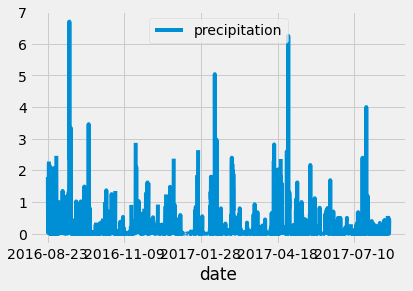

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


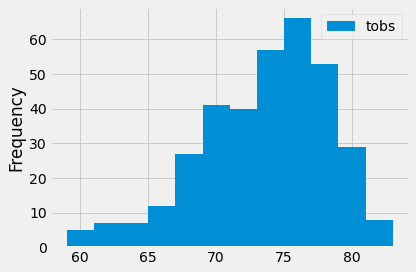

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

#print(results)

 # Convert the results into a DataFrame to make it easier to read.
df = pd.DataFrame(results, columns=["tobs"])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()

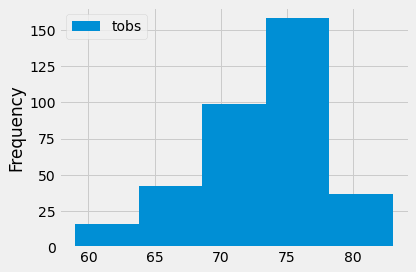

In [25]:
# Practice different bin size

df.plot.hist(bins=5)
plt.tight_layout()

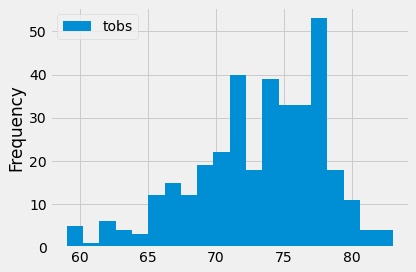

In [26]:
# Practice different bin size
df.plot.hist(bins=20)
plt.tight_layout()

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge